# predicting passanger's survival on titanic using machine learning

This notebook look into various python based machine learning and data science libraries in an attempt to buid a machine learning model capable ofpredicting wheater or not a passanger survived 


we are going to take following approch:

problem defination
data
evaluation
features
modelling
exparimantation

# problem
use machine learning to create a model that predicts which passengers survived the Titanic shipwreck. 

# data
data comes from kaggel . Use:  https://www.kaggle.com/c/titanic/data?select=train.csv

# features
1. survival : Survival 
  * 0 = No 
  * 1 = Yes
2. pclass : Ticket class 
  * 1 = 1st
  * 2 = 2nd
  * 3 = 3rd
3. sex : Sex
4. Age : Age in years 
5. sibsp :  The dataset defines family relations in this way...
  * Sibling = brother, sister, stepbrother, stepsister
  * Spouse = husband, wife (mistresses and fiancés were ignored)

6. parch:  The dataset defines family relations in this way...
  * Parent = mother, father
  * Child = daughter, son, stepdaughter, stepson
  Some children travelled only with a nanny, therefore parch=0 for them. 
7. ticket : Ticket number 
8. fare : Passenger fare 
9. cabin : Cabin number 
10. embarked : Port of Embarkation 
    * C = Cherbourg
    * Q = Queenstown
    * S = Southampton

# Preparing tools

we are going to use numpy, pandas, matplotlib for data analysis and manipulation

In [42]:
# import all tools we need
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

#models of sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# model evaluation
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve


# load data

In [139]:
df = pd.read_csv('train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# data exploration (exploratory data analysis or EDA)

the goal here is to find more about the data and become a subject matter export on the

1. what questions r u trying to solve
2. what kind of data do we have and how do we treat different types
3. whats missing data and do u deal with it
4. where are the outliers and why sould u care about them
5. how can uh add , change or remove to get more out of ur data

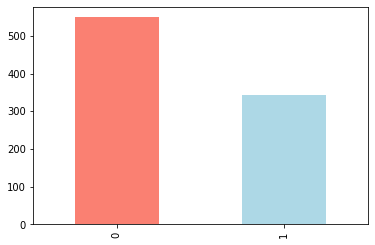

In [140]:
df['Survived'].value_counts().plot(kind = 'bar', color = ['salmon', 'lightblue'])

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


# 1. make sure there is no null value and all data is numeric

In [142]:
# check if any value is null
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [143]:
# let's get nmae of all columns that are string
for labels, contents in df.items():
    if pd.api.types.is_string_dtype(contents):
        print(labels)

Name
Sex
Ticket
Cabin
Embarked


In [144]:
## now for converting all string values into categorial values
for labels, contents in df.items():
    if pd.api.types.is_string_dtype(contents):
        df[labels] = contents.astype('category').cat.as_ordered()

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    category
 4   Sex          891 non-null    category
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    category
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    category
 11  Embarked     889 non-null    category
dtypes: category(5), float64(2), int64(5)
memory usage: 101.6 KB


In [146]:
df.Embarked.cat.codes

0      2
1      0
2      2
3      2
4      2
      ..
886    2
887    2
888    2
889    0
890    1
Length: 891, dtype: int8

In [147]:
df.dtypes

PassengerId       int64
Survived          int64
Pclass            int64
Name           category
Sex            category
Age             float64
SibSp             int64
Parch             int64
Ticket         category
Fare            float64
Cabin          category
Embarked       category
dtype: object

here name, sex, ticket, cabin and embarked are obeject type... Let's make our data numeric

In [148]:
# Check missing data
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [149]:
# check which columns are numeric
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

PassengerId
Survived
Pclass
Age
SibSp
Parch
Fare


In [150]:
# check which numeric column has null value
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

Age


In [151]:
## check for columns which aren't numeric
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)
       

Name
Sex
Ticket
Cabin
Embarked


In [152]:
# turn categorial variables into numbers and fill missing
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        # turn categories into numbers where missing values will be 0
        df[label] = pd.Categorical(content).codes +1

In [153]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
dtype: int64

In [154]:
# filling missing data
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # fill missing numeric values with median
            df[label] = content.fillna(content.median())

In [156]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [157]:
# make a corelation matrix
df.corr()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,1.000000,-0.005007,-0.035144,-0.038559,0.042939,0.034212,-0.057527,-0.001652,-0.056554,0.012658,-0.000637,0.012985
Survived,-0.005007,1.000000,-0.338481,-0.057343,-0.543351,-0.064910,-0.035322,0.081629,-0.164549,0.257307,0.276235,-0.176509
Pclass,-0.035144,-0.338481,1.000000,0.052831,0.131900,-0.339898,0.083081,0.018443,0.319869,-0.549500,-0.537419,0.173511
Name,-0.038559,-0.057343,0.052831,1.000000,0.020314,0.048252,-0.017230,-0.049105,0.047348,-0.049173,0.003122,-0.010633
Sex,0.042939,-0.543351,0.131900,0.020314,1.000000,0.081163,-0.114631,-0.245489,0.059372,-0.182333,-0.137704,0.118492
Age,0.034212,-0.064910,-0.339898,0.048252,0.081163,1.000000,-0.233296,-0.172482,-0.070382,0.096688,0.164550,-0.031903
SibSp,-0.057527,-0.035322,0.083081,-0.017230,-0.114631,-0.233296,1.000000,0.414838,0.079461,0.159651,-0.024829,0.071480
Parch,-0.001652,0.081629,0.018443,-0.049105,-0.245489,-0.172482,0.414838,1.000000,0.020003,0.216225,0.033585,0.043351
Ticket,-0.056554,-0.164549,0.319869,0.047348,0.059372,-0.070382,0.079461,0.020003,1.000000,-0.013885,-0.176515,0.011146
Fare,0.012658,0.257307,-0.549500,-0.049173,-0.182333,0.096688,0.159651,0.216225,-0.013885,1.000000,0.310987,-0.230365


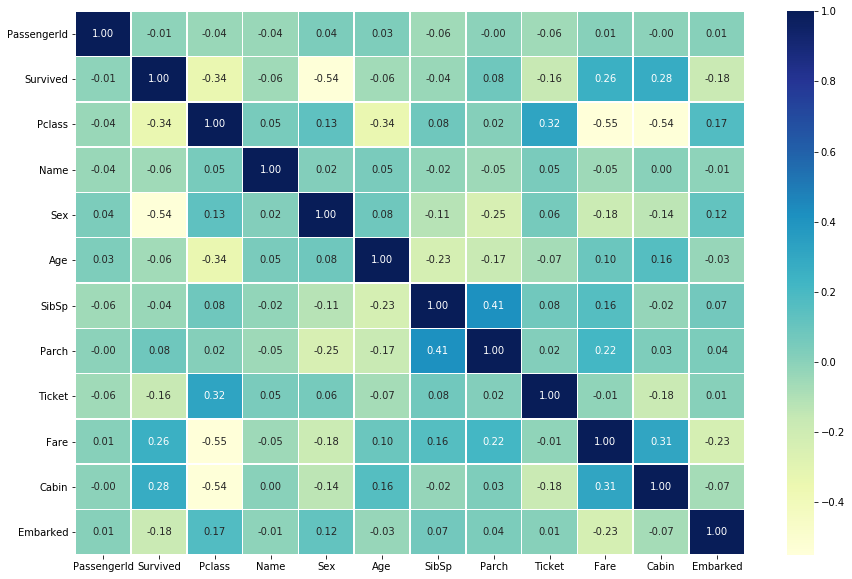

In [158]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot = True,
                 linewidths= 0.5,
                 fmt = '.2f',
                 cmap = 'YlGnBu')

In [159]:
pd.crosstab(df.Survived, df.Pclass)

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


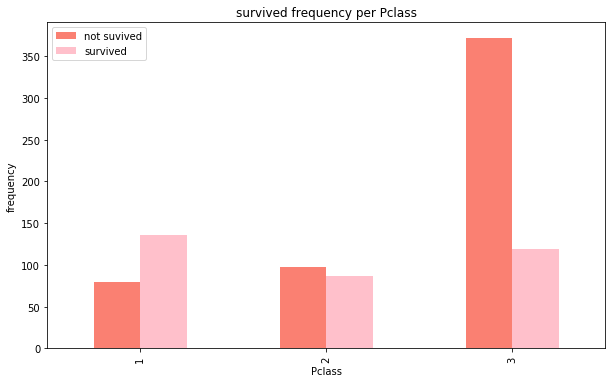

In [160]:
pd.crosstab(df.Pclass, df.Survived).plot(kind = 'bar',
                                   figsize=(10,6),
                                   color = ['salmon', 'pink'])

plt.title("survived frequency per Pclass")
plt.xlabel('Pclass')
plt.ylabel('frequency')
plt.legend(['not suvived', 'survived'])

# Modeling

In [161]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,109,2,22.0,1,0,524,7.2500,0,3
1,2,1,1,191,1,38.0,1,0,597,71.2833,82,1
2,3,1,3,354,1,26.0,0,0,670,7.9250,0,3
3,4,1,1,273,1,35.0,1,0,50,53.1000,56,3
4,5,0,3,16,2,35.0,0,0,473,8.0500,0,3


In [162]:
# split the data
x = df.drop('Survived', axis =1)
x

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,109,2,22.0,1,0,524,7.2500,0,3
1,2,1,191,1,38.0,1,0,597,71.2833,82,1
2,3,3,354,1,26.0,0,0,670,7.9250,0,3
3,4,1,273,1,35.0,1,0,50,53.1000,56,3
4,5,3,16,2,35.0,0,0,473,8.0500,0,3
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,549,2,27.0,0,0,102,13.0000,0,3
887,888,1,304,1,19.0,0,0,15,30.0000,31,3
888,889,3,414,1,28.0,1,2,676,23.4500,0,3
889,890,1,82,2,26.0,0,0,9,30.0000,61,1


In [163]:
y = df['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [164]:
# split data into train and test split
np.random.seed(42)

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2)

now we have got our data split ito train and test data, now it's time to build a machine learning model

we'll train it (find patterns) on train set

we'll test it (using patterns) on test set

We are going to try 3 different machine learning models:
1. logistic regression
2. k-nearest neighbour classifier
3. random forest classifier

In [165]:
# put models in a dictionary
clf = { 'logistic regressor' : LogisticRegression(),
         'k-n neighbour' : KNeighborsClassifier(),
         'random forest' : RandomForestClassifier()}

# create a function to fit and score models
def fit_and_score(clf, xtrain, xtest, ytrain, ytest):
    """
    fits and evaluates machine learning models
    """
    # set random seed
    
    np.random.seed(42)
    # make dictionary to store model scores
    model_scores = {}
    # loop through models
    for name, model in clf.items():
        # fit the model to the data
        model.fit(xtrain, ytrain)
        #evaluate the model and append it's score into model_scores
        model_scores[name] = model.score(xtest, ytest)
    return model_scores


In [166]:
model_scores = fit_and_score(clf = clf,
                             xtrain = xtrain,
                             xtest = xtest, 
                             ytrain = ytrain, ytest=ytest)
model_scores

C:\Users\parid\desktop\ml-course\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'logistic regressor': 0.7206703910614525,
 'k-n neighbour': 0.659217877094972,
 'random forest': 0.8324022346368715}

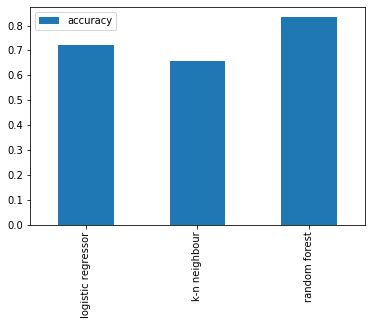

In [167]:
model_compare = pd.DataFrame(model_scores, index =['accuracy'])
model_compare.T.plot.bar();

Now we have got a baseline model.... and we know a model's first predictions aren't always what we should base our next steps off. what should we do?

now let's look at the following
* Hyperperameter tuning
* feature importance
* confusion matrix
* cross-validation
* precision
* recall
* f1 score
* classification report
* ROC curve
* area under the curve (AUC)

## hyperperameter tuning (by hands)

In [168]:
# let's tune KNN

train_scores = []
test_scores = []

# create a list of different values of n_neighbours
neighbours = range(1, 21)

# set up KNN instance
KNN = KNeighborsClassifier()

# loop through different n_neighbours
for i in neighbours:
    KNN.set_params(n_neighbors = i)

    # fit the algorithom
    KNN.fit(xtrain, ytrain)
    
    # update the training score list
    train_scores.append(KNN.score(xtrain, ytrain))
    
    # update the test score list
    test_scores.append(KNN.score(xtest, ytest))

In [169]:
train_scores

[1.0,
 0.8047752808988764,
 0.8286516853932584,
 0.7542134831460674,
 0.7556179775280899,
 0.7176966292134831,
 0.7148876404494382,
 0.7050561797752809,
 0.7120786516853933,
 0.7120786516853933,
 0.7064606741573034,
 0.6924157303370787,
 0.699438202247191,
 0.6811797752808989,
 0.6952247191011236,
 0.6671348314606742,
 0.6853932584269663,
 0.6713483146067416,
 0.6910112359550562,
 0.6699438202247191]

In [170]:
test_scores

[0.6256983240223464,
 0.6089385474860335,
 0.6312849162011173,
 0.5977653631284916,
 0.659217877094972,
 0.6256983240223464,
 0.664804469273743,
 0.6480446927374302,
 0.6703910614525139,
 0.6871508379888268,
 0.7039106145251397,
 0.6871508379888268,
 0.6983240223463687,
 0.659217877094972,
 0.6927374301675978,
 0.6815642458100558,
 0.6871508379888268,
 0.6759776536312849,
 0.6815642458100558,
 0.659217877094972]

max knn score on the test data : 70.39%


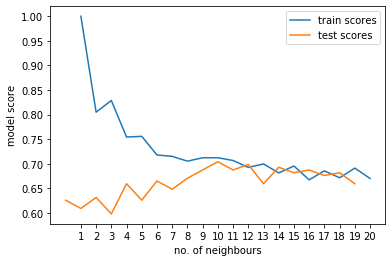

In [171]:
plt.plot(neighbours, train_scores, test_scores)
plt.xlabel('no. of neighbours')
plt.ylabel('model score')
plt.xticks(np.arange(1, 21, 1))
plt.legend(['train scores', 'test scores'])

print(f'max knn score on the test data : {max(test_scores) * 100 :.2f}%')

# hyperperameter tuning with RandomizedSearchCV

we're going to tune:
* LogisticRegression
* randomforest

In [172]:
# create a hyperperameter grid for logistic regression
lr_grid = {'C' : np.logspace(-4, 4, 20),
            'solver': ['liblinear']}

# create a hyperperameter grid for random forest
rf_grid = {'n_estimators' : np.arange(10, 1000, 50),
           'max_depth': [None, 3, 5, 10],
           'min_samples_split' : np.arange(2, 20, 2),
           'min_samples_leaf' : np.arange(1, 20, 2)}

now we have got hyperperameters grid setup let's tune our models by using randomizedsearchcv

In [173]:
# Tune LogisticRegression

np.random.seed(42)

#set up random hyperperameter search for LogisticResgression
rs_lr = RandomizedSearchCV(LogisticRegression(),
                           param_distributions= lr_grid,
                           cv = 5, 
                            n_iter= 20,
                            verbose=True)

#fit random hyperperameter search for LogisticRegression
rs_lr.fit(xtrain, ytrain)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.9s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'C':...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [174]:
rs_lr.best_params_

{'solver': 'liblinear', 'C': 11.288378916846883}

In [175]:
rs_lr.score(xtest, ytest)

0.8100558659217877

In [176]:
# tune random forest classifier
np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv = 5, 
                           n_iter = 20, 
                           verbose=True)

rs_rf.fit(xtrain, ytrain)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.8min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [177]:
rs_rf.score(xtest, ytest)

0.8379888268156425

since logistic regression model works best we will try and improve it with gridSearchCV

# Hyper tuning with GridSearchCV

In [178]:
# creating grid for LogisticResgession Model
lr_grid= {'C' : np.logspace(-4, 4, 30),
          'solver' :['liblinear']}

# setup grid hyperperameter search for logistic regressor
lr_gs = GridSearchCV(LogisticRegression(),
                     param_grid= lr_grid,
                     cv = 5, 
                     verbose=True)

lr_gs.fit(xtrain, ytrain)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.4s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e-04, 1.8...
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5

In [179]:
lr_gs.best_params_

{'C': 4.893900918477489, 'solver': 'liblinear'}

In [180]:
lr_gs.score(xtest, ytest)

0.8100558659217877

## Evaluating Our tuned machine learning model , beyond accuracy

* roc curve and area under the curve 
* confusion matrix 
* classification report
* precision
* recall
* f1 score

... and it would be great if cross - validation is used where possible

to make comparisions and evaluate our trained model, first we need to make predictions

In [181]:
# let's make predictions with tuned model
y_preds = lr_gs.predict(xtest)

In [182]:
y_preds


array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1], dtype=int64)

In [183]:
ytest

709    1
439    0
840    0
720    1
39     1
      ..
433    0
773    0
25     1
84     1
10     1
Name: Survived, Length: 179, dtype: int64

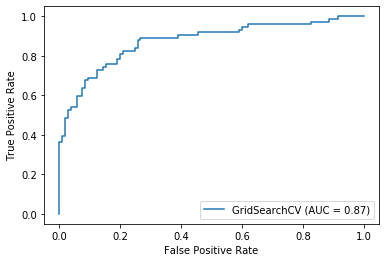

In [184]:
# plot rOC curve and calculate AUC metrics
plot_roc_curve(lr_gs, xtest, ytest)

In [185]:
test_data = pd.read_csv('test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# cleaning test data

In [186]:
# check if any value is null
test_data.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [187]:
# filling missing data
for label, content in test_data.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # fill missing numeric values with median
            test_data[label] = content.fillna(content.median())
            

In [188]:
# check which numeric column has null value
for label, content in test_data.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [189]:
test_data.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [190]:
## check for columns which aren't numeric
for label, content in test_data.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)
       

Name
Sex
Ticket
Cabin
Embarked


In [191]:
# turn categorial variables into numbers and fill missing
for label, content in test_data.items():
    if not pd.api.types.is_numeric_dtype(content):
        # turn categories into numbers where missing values will be 0
        test_data[label] = pd.Categorical(content).codes +1

In [192]:
test_data.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [193]:
result_preds =  lr_gs.predict(test_data)
result_preds

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [194]:
import pickle
# save model to disk
filename = 'titanic-project.sav'
pickle.dump(clf, open(filename, 'wb'))

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = pd.DataFrame(result_preds, index = test_data['PassengerId'] , columns = ['survived'])
print(result)

             survived
PassengerId          
892                 0
893                 1
894                 0
895                 0
896                 1
...               ...
1305                0
1306                1
1307                0
1308                0
1309                0

[418 rows x 1 columns]


In [195]:
len(result)

418

In [196]:
result.to_csv('resulted-predictions.csv')